# Dataset Overview – Diabetes Health Indicators

#### This dataset consists of 100,000 anonymized patient records created for diabetes-related risk assessment, predictive modeling, and general machine learning tasks. The data is fully cleaned and preprocessed, making it suitable for classification, regression, feature engineering, statistical exploration, and visualization.

#### The dataset contains detailed patient information covering demographics, lifestyle behaviors, family medical history, and clinical health measurements. These features represent widely recognized indicators used in diabetes risk evaluation. Although the data is synthetically generated using statistical patterns based on real medical studies, it realistically mirrors real-world health trends while ensuring complete privacy protection.

In [85]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sam\.cache\kagglehub\datasets\mohankrishnathalla\diabetes-health-indicators-dataset\versions\1


In [183]:
import pandas as pd
import numpy as np


## Loading the data 

In [221]:
dib_df = pd.read_csv('C:\\Users\\sam\\.cache\\kagglehub\\datasets\\mohankrishnathalla\\diabetes-health-indicators-dataset\\versions\\1\\diabetes_dataset.csv')

In [222]:
dib_df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


### Shape of the Data 

In [223]:
dib_df.shape

(100000, 31)

### Finding the missing values and null values

In [224]:
print("Missing values",dib_df.isnull().any().sum())

print("Nan values",dib_df.isna().any().sum())

Missing values 0
Nan values 0


### Finding Duplicated values

In [225]:
print("Duplicated values" ,dib_df.duplicated().any().sum())

Duplicated values 0


In [226]:
dib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [227]:
dib_df[['hba1c']].var()

hba1c    0.662467
dtype: float64

In [228]:
obj_col = [i for i in dib_df.columns if dib_df[i].dtype == 'object']
num_col = [i for i in dib_df.columns if dib_df[i].dtype in ('int64','float64')]

# Numerical columns 

In [229]:
num_col

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c',
 'diabetes_risk_score',
 'diagnosed_diabetes']

# Object Columns

In [230]:
obj_col

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'employment_status',
 'smoking_status',
 'diabetes_stage']

In [231]:
# CHecking dulicate records
dib_df.duplicated().sum()

np.int64(0)

## Drop the irrevalant columns

#### education_level → indirect

#### income_level → indirect

#### employment_status → indirect

In [232]:
dib_df = dib_df.drop(columns=['education_level','income_level','employment_status'],axis=1)
dib_df.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Never,0,215,5.7,7.9,7.9,0,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Former,1,143,6.7,6.5,8.7,0,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Never,1,57,6.4,10.0,8.1,1,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Never,0,49,3.4,6.6,5.2,0,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Never,1,109,7.2,7.4,5.0,0,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='diabetes_risk_score', ylabel='Density'>

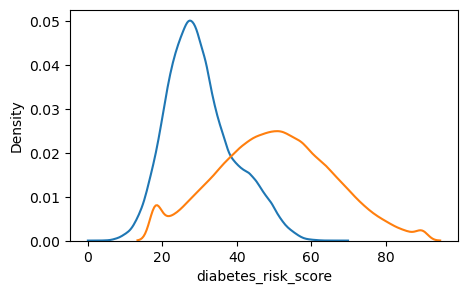

In [234]:
plt.figure(figsize=(5,3))
sns.kdeplot(dib_df.diabetes_risk_score)
sns.kdeplot(dib_df.age)


<Axes: xlabel='gender', ylabel='diagnosed_diabetes'>

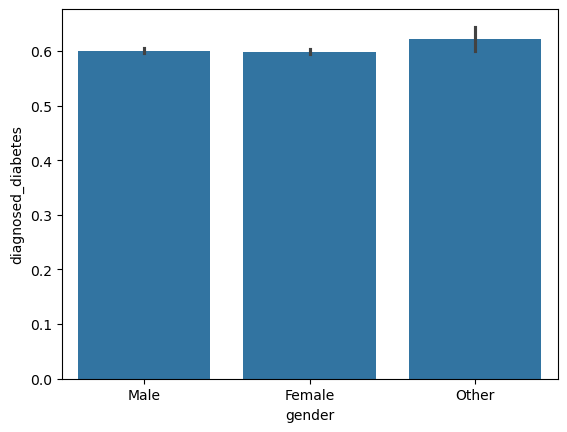

In [235]:
sns.barplot(x='gender', y='diagnosed_diabetes', data=dib_df)


### All three categories in Gender fall into 60% of the diagonised_diabitites and other's is slightly more than male and female  

<Axes: xlabel='smoking_status', ylabel='count'>

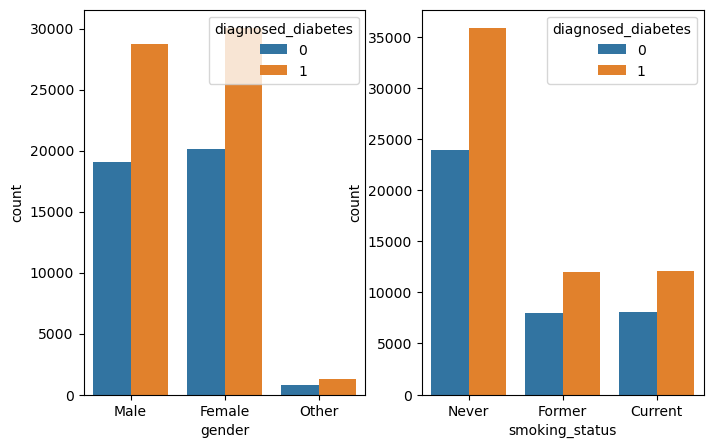

In [236]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.countplot(x=dib_df.gender,hue=dib_df.diagnosed_diabetes)

plt.subplot(1,2,2)
sns.countplot(x=dib_df.smoking_status,hue=dib_df.diagnosed_diabetes)

In [237]:
dib_df[dib_df['diagnosed_diabetes']==0].diabetes_stage.unique()

array(['No Diabetes', 'Pre-Diabetes', 'Type 1', 'Gestational'],
      dtype=object)

In [238]:
dib_df[dib_df['diagnosed_diabetes']==1].diabetes_stage.unique()

array(['Type 2', 'Gestational', 'Type 1'], dtype=object)

## Feature Enginerin Steps 
#### Adding extra features 

# 🩺 Feature Engineering: Meaning of New Health Indicators

This section explains the purpose and meaning of the feature-engineered columns created for glucose and cholesterol analysis.

---

## 🔹 glucose_spike
**Meaning:**  
The increase in blood glucose after eating (postprandial minus fasting).  

**Why it matters:**  
A high spike indicates poor glucose regulation, early diabetes signs, or weak insulin response. It helps detect people who have normal fasting glucose but abnormal post-meal behaviour.

---

## 🔹 glucose_ratio
**Meaning:**  
How many times higher the post-meal glucose level is compared to fasting glucose.  

**Why it matters:**  
It shows the *relative rise* in glucose. This ratio helps understand glucose response more consistently, especially when fasting glucose varies among individuals.

---

## 🔹 ldl_hdl_ratio
**Meaning:**  
The balance between “bad” cholesterol (LDL) and “good” cholesterol (HDL).  

**Why it matters:**  
A high ratio means more LDL and less HDL, which strongly increases the risk of heart disease. This ratio is used clinically as a key cardiac risk indicator.

---

## 🔹 cholesterol_hdl_ratio
**Meaning:**  
Total cholesterol level relative to protective HDL cholesterol.  

**Why it matters:**  
Even if total cholesterol is normal, low HDL is dangerous. A high ratio signals poor lipid balance and higher risk of cardiovascular problems and metabolic syndrome.

---

These engineered features add medical interpretability and help machine-learning models better detect patterns related to diabetes, insulin response, and cardiovascular health.


In [239]:
# Check for data leakage
correlation = dib_df[['diabetes_risk_score', 'diagnosed_diabetes']].corr().iloc[0,1]
print(f"Correlation: {correlation:.3f}")

if correlation > 0.6:
    print("DATA LEAKAGE DETECTED - Remove diabetes_risk_score!")
else:
    print("✓ No leakage - safe to use")

Correlation: 0.277
✓ No leakage - safe to use


In [240]:
dib_df['glucose_spike'] = dib_df['glucose_postprandial'] - dib_df['glucose_fasting']

dib_df['glucose_ratio'] = dib_df['glucose_postprandial'] / dib_df['glucose_fasting']


dib_df['ldl_hdl_ratio'] = dib_df['ldl_cholesterol'] / dib_df['hdl_cholesterol']
dib_df['cholesterol_hdl_ratio'] = dib_df['cholesterol_total'] / dib_df['hdl_cholesterol']


In [241]:
dib_df.sample(5)

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,...,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes,glucose_spike,glucose_ratio,ldl_hdl_ratio,cholesterol_hdl_ratio
81615,36,Female,Hispanic,Never,4,222,6.4,7.3,9.9,0,...,138,6.03,6.01,19.0,Pre-Diabetes,0,43,1.452632,1.465517,2.655172
8883,44,Male,White,Never,1,154,7.2,6.5,9.8,0,...,121,13.78,5.79,25.0,Pre-Diabetes,0,1,1.008333,3.750000,5.575000
31082,62,Female,Asian,Never,6,54,7.3,5.2,2.8,0,...,142,16.02,6.35,32.0,Pre-Diabetes,0,18,1.145161,1.705882,3.411765
5693,33,Male,White,Current,2,219,5.7,7.1,2.9,1,...,96,10.37,4.86,33.7,Pre-Diabetes,0,-7,0.932039,1.465517,3.155172
60510,42,Male,White,Current,0,218,3.5,6.3,1.8,0,...,109,7.20,4.97,19.3,No Diabetes,0,12,1.123711,2.720930,4.348837


In [242]:
pd.crosstab(dib_df['diabetes_stage'], dib_df['diagnosed_diabetes'])


diagnosed_diabetes,0,1
diabetes_stage,,
Gestational,120,158
No Diabetes,7981,0
Pre-Diabetes,31845,0
Type 1,56,66
Type 2,0,59774


## Drop the diabetes_stage column

In [243]:
dib_df.drop(columns=['diabetes_stage'],inplace=True)

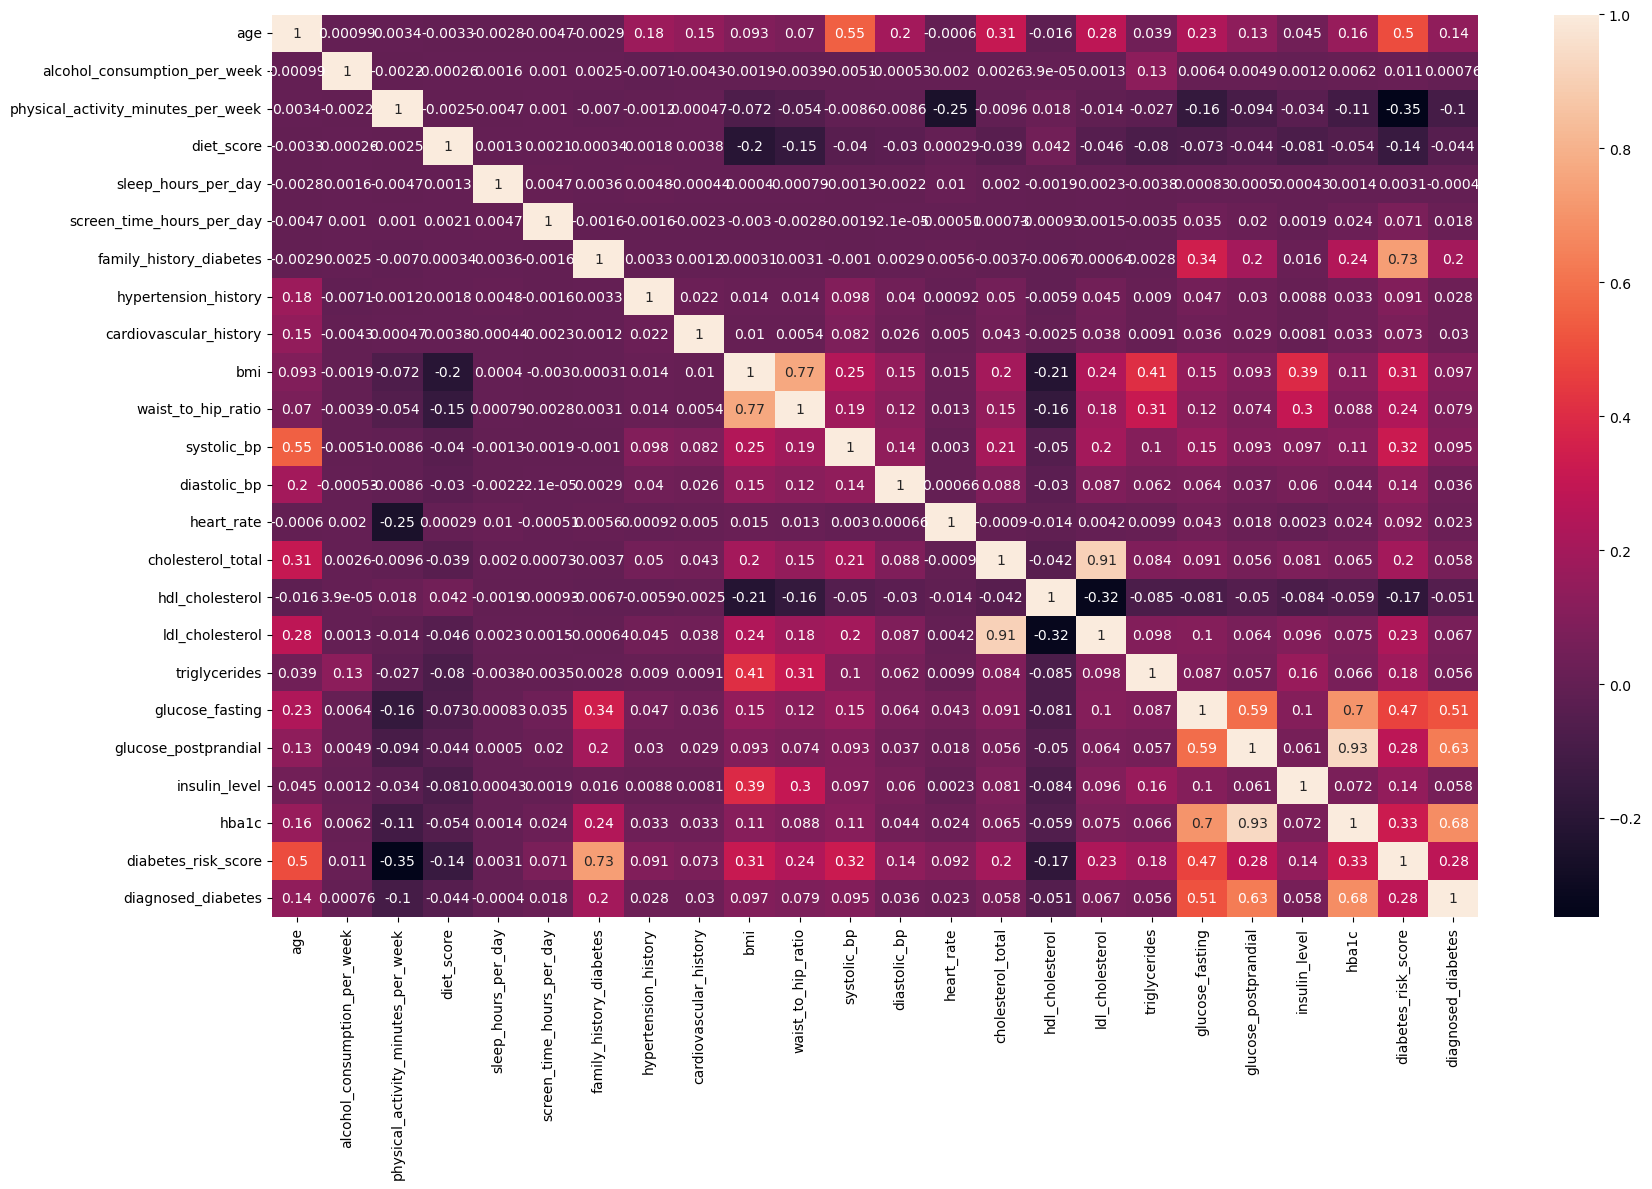

In [244]:
plt.figure(figsize=(18,12))
sns.heatmap(dib_df[num_col].corr(),annot=True)
plt.tight_layout()
plt.show()

## shows redundency and drop the column 

In [245]:
dib_df = dib_df.drop(columns=['cardiovascular_history', 'sleep_hours_per_day', 'hypertension_history'],axis=1)

In [246]:
len(dib_df.columns)

28

# Distribution of the data 

In [247]:
dib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   smoking_status                      100000 non-null  object 
 4   alcohol_consumption_per_week        100000 non-null  int64  
 5   physical_activity_minutes_per_week  100000 non-null  int64  
 6   diet_score                          100000 non-null  float64
 7   screen_time_hours_per_day           100000 non-null  float64
 8   family_history_diabetes             100000 non-null  int64  
 9   bmi                                 100000 non-null  float64
 10  waist_to_hip_ratio                  100000 non-null  float64
 11  systolic_bp                

In [248]:
dib_df.head()

,age,gender,ethnicity,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,family_history_diabetes,bmi,...,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,glucose_spike,glucose_ratio,ldl_hdl_ratio,cholesterol_hdl_ratio
0,58,Male,Asian,Never,0,215,5.7,7.9,0,30.5,...,136,236,6.36,8.18,29.6,1,100,1.735294,3.902439,5.829268
1,48,Female,White,Former,1,143,6.7,8.7,0,23.1,...,93,150,2.00,5.63,23.0,0,57,1.612903,0.909091,2.109091
2,60,Male,Hispanic,Never,1,57,6.4,8.1,1,22.2,...,118,195,5.07,7.51,44.7,1,77,1.652542,1.500000,3.227273
3,74,Female,Black,Never,0,49,3.4,5.2,0,26.8,...,139,253,5.28,9.03,38.2,1,114,1.820144,1.580000,3.420000
4,46,Male,White,Never,1,109,7.2,5.0,0,21.2,...,137,184,12.74,7.20,23.5,1,47,1.343066,2.403846,4.038462


## Checking the Correlation the Columns 

In [249]:
dib_df[['cholesterol_total','hdl_cholesterol','ldl_cholesterol']].corr()

,cholesterol_total,hdl_cholesterol,ldl_cholesterol
cholesterol_total,1.000000,-0.042077,0.906132
hdl_cholesterol,-0.042077,1.000000,-0.323713
ldl_cholesterol,0.906132,-0.323713,1.000000


### Since 3 cholestrol are having Correlation we will drop One of the Columns 

In [250]:
dib_df.drop(columns=['cholesterol_total'],inplace=True)

# Checking the Balance of the Data 

#### our Data is Slighty imbalanced

<Axes: xlabel='diagnosed_diabetes'>

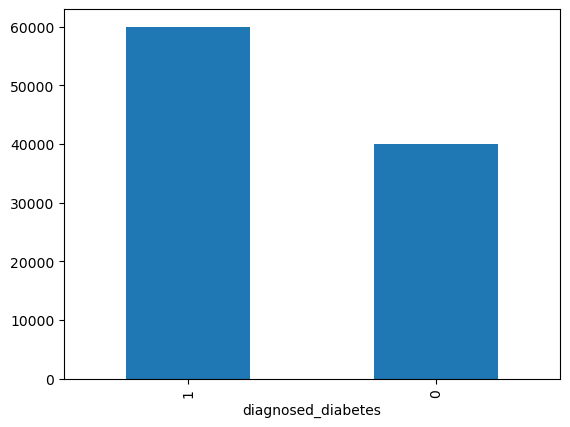

In [251]:
dib_df.diagnosed_diabetes.value_counts().plot.bar()

<Axes: >

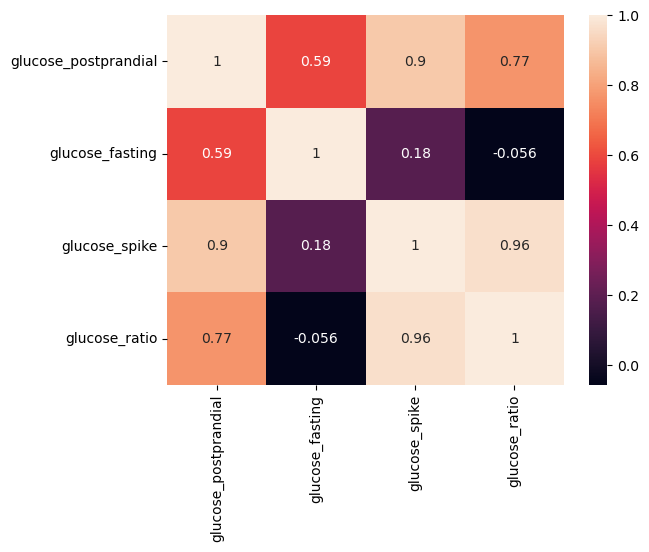

In [252]:
sns.heatmap(dib_df[['glucose_postprandial','glucose_fasting','glucose_spike','glucose_ratio']].corr(),annot=True)

#### glucose_spike and glucose_ratio are almost duplicates.

#### They both duplicate information contained in glucose_postprandial.

**glucose_fasting**
**glucose_postprandial**
**ONE OF (glucose_spike or glucose_ratio)**

In [253]:
dib_df.drop(columns=['glucose_spike','glucose_ratio'],inplace=True)

## Since we do more features in our Data lets performs feature selection using MUtual class info and Random forest to select the important features in our data 

### Feature selection using Mutual class info 


In [255]:
from sklearn.feature_selection import mutual_info_classif

X = dib_df.drop("diagnosed_diabetes", axis=1)
y = dib_df["diagnosed_diabetes"]

X_numeric = X.select_dtypes(include=['int64', 'float64'])


mi_scores = mutual_info_classif(X_numeric, y, random_state=42)

mi_df = pd.DataFrame({
    "feature": X_numeric.columns,
    "MI_score": mi_scores
}).sort_values(by="MI_score", ascending=False)



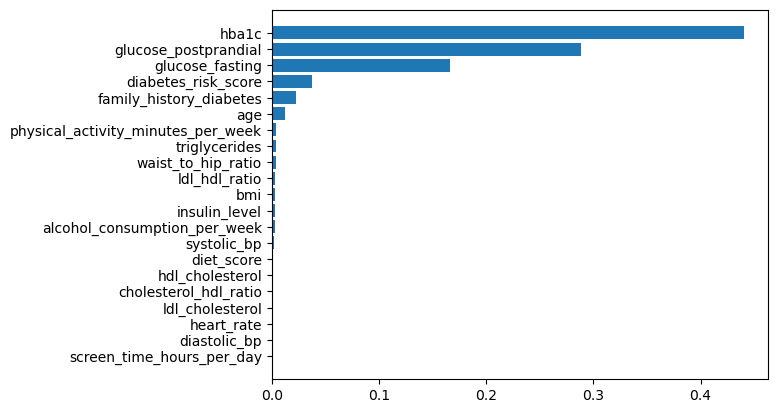

In [256]:
plt.barh(mi_df['feature'],mi_df['MI_score'])
plt.gca().invert_yaxis()

## Feature selection using Random forest

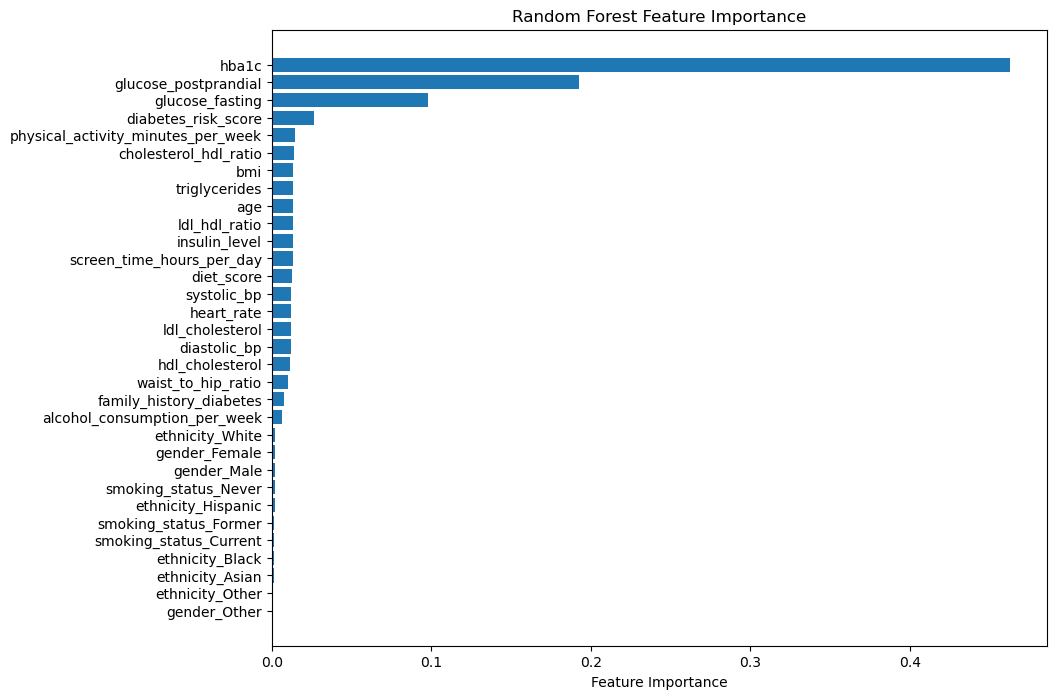

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
target = "diagnosed_diabetes"

categorical_cols = ["gender", "ethnicity", "smoking_status"]

df_encoded = pd.get_dummies(dib_df, columns=categorical_cols, drop_first=False)

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.gca().invert_yaxis()  # highest on top
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


### Final selected columns for training the model using seature selection techinques like Mutual class info and randomforest feature importance 

In [272]:
## selected columns

final_columns  = [
    "hba1c",
    "glucose_postprandial",
    "glucose_fasting",
    "diabetes_risk_score",
    "physical_activity_minutes_per_week",
    "family_history_diabetes",
    "age",
    "triglycerides",
    "waist_to_hip_ratio",
    "ldl_hdl_ratio",
    "insulin_level",
    "diagnosed_diabetes"
]
final_columns


['hba1c',
 'glucose_postprandial',
 'glucose_fasting',
 'diabetes_risk_score',
 'physical_activity_minutes_per_week',
 'family_history_diabetes',
 'age',
 'triglycerides',
 'waist_to_hip_ratio',
 'ldl_hdl_ratio',
 'insulin_level',
 'diagnosed_diabetes']

In [273]:
### create a new Dataframe for select columns:

In [274]:
dib_df2 =  dib_df[final_columns]

In [275]:
df3 = dib_df2.copy()
df3.sample(10)

,hba1c,glucose_postprandial,glucose_fasting,diabetes_risk_score,physical_activity_minutes_per_week,family_history_diabetes,age,triglycerides,waist_to_hip_ratio,ldl_hdl_ratio,insulin_level,diagnosed_diabetes
85718,5.95,141,90,21.4,68,0,54,30,0.75,1.017544,2.00,0
15306,6.51,147,123,44.0,128,1,51,49,0.86,2.631579,4.34,1
70012,6.28,171,102,32.7,32,0,61,153,0.83,0.781250,2.00,0
49145,7.77,230,115,35.0,8,0,71,139,0.90,1.160000,3.39,1
75397,7.33,186,113,45.5,18,1,66,56,0.81,1.183333,6.00,1
94299,5.98,140,107,40.3,67,1,30,151,0.86,1.754386,7.53,0
59103,6.01,125,104,29.8,90,0,48,154,0.82,1.781818,9.13,0
43550,6.93,164,119,49.3,62,1,66,67,0.79,1.479167,6.05,1
35641,5.77,123,93,25.6,342,1,18,149,0.88,2.322581,2.00,0
46617,6.58,164,129,20.5,67,0,38,86,0.89,1.649123,7.55,1


In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
class Diabaities_pred:
    
    def __init__(self,x):
        self.x  = x
        
    def len_columns(self):
        len_col =  len(self.x.columns)
        return len_col
    
    def ploting_visual(self,plot_):
        cols = [col for col in self.x.columns if col != 'diagnosed_diabetes']
        
        # Create dynamic subplot count
        n = len(cols)
        rows = (n + 1) // 2   
        fig, axes = plt.subplots(rows, 2, figsize=(8,12))
        
        axes = axes.flatten()
        
        for i, col in enumerate(cols):
            plot_(self.x[col], color='blue', ax=axes[i])        
        
        plt.tight_layout()
        plt.show()

## Distribution Before Log Transformation of the data  

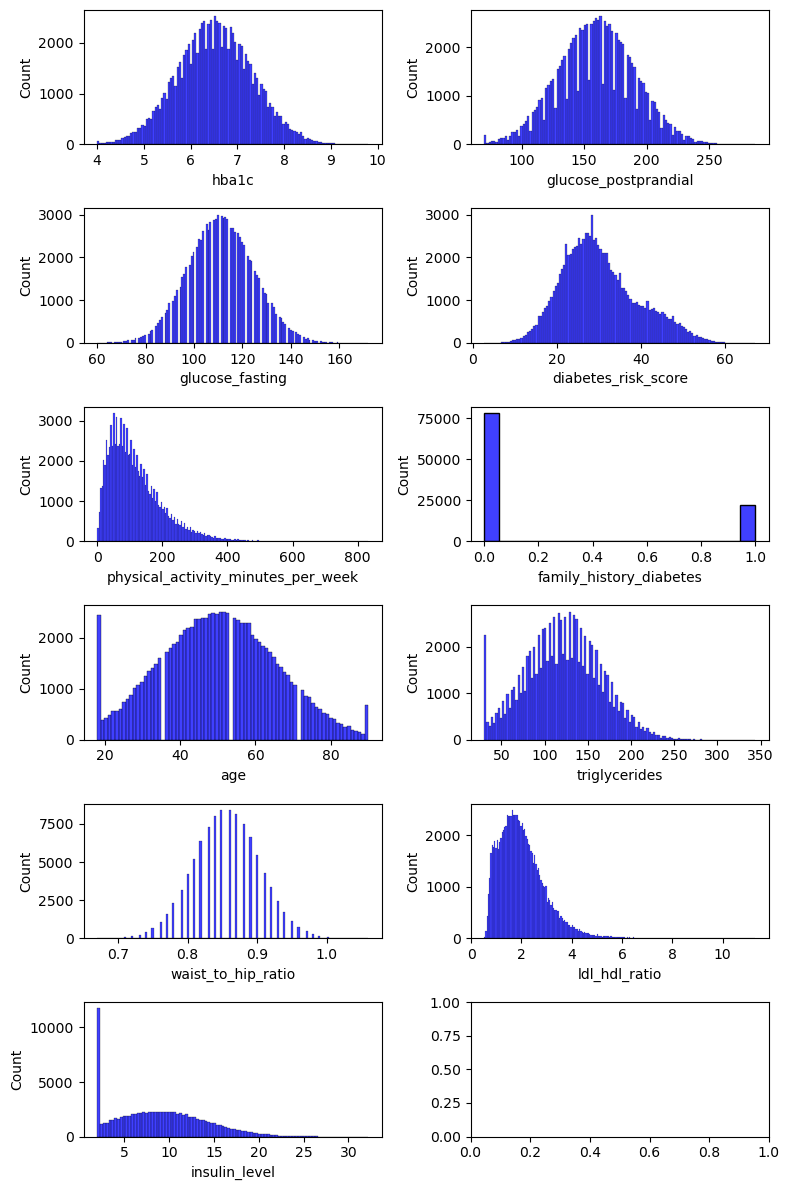

In [278]:
p0 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p0.len_columns()
p0.ploting_visual(sns.histplot)

# Checking the Outliers

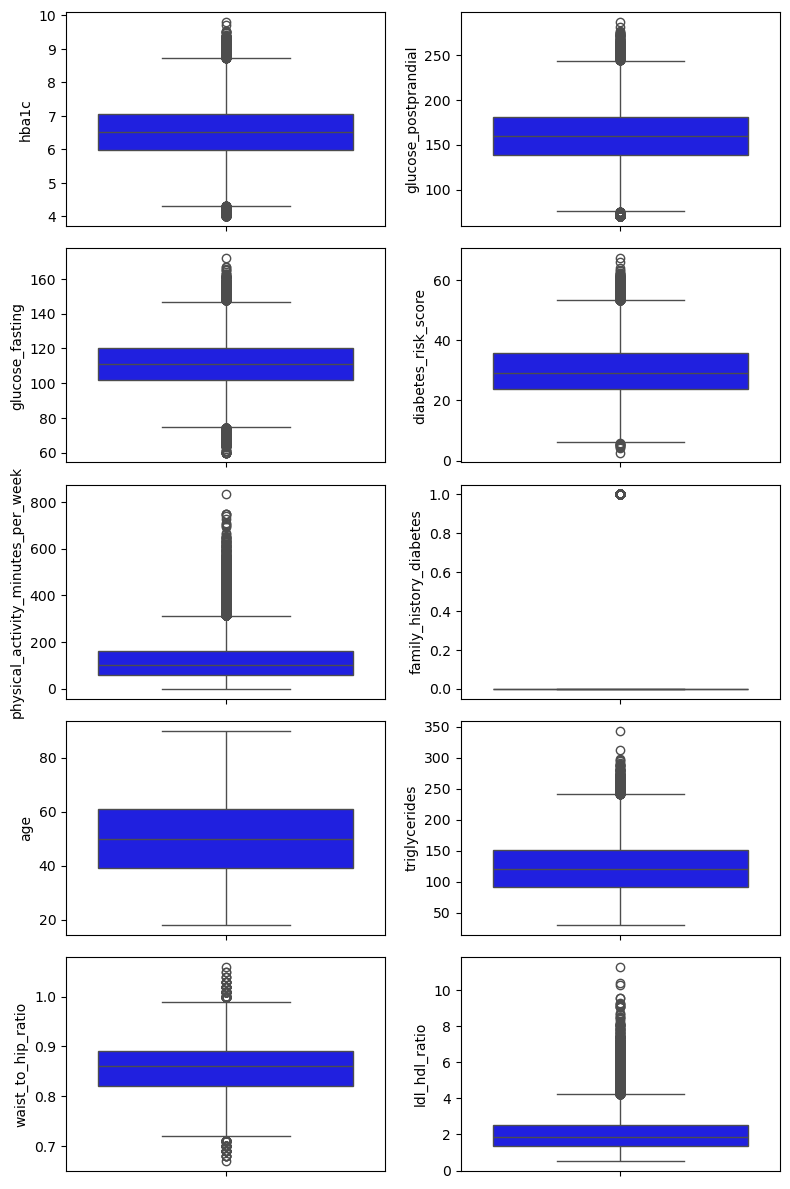

In [269]:
p1 = Diabaities_pred(df3.select_dtypes(include=['int64','float']))
p1.len_columns()
p1.ploting_visual(sns.boxplot)

## since the outliers are valid 

| Feature                  | Rationale for Keeping Outliers                                                                                       |
|--------------------------|------------------------------------------------------------------------------------------------------------------------|
| hba1c                    | Max value (9.8%) is crucial for modeling severe diabetes; min value (4.0%) is biologically plausible.                  |
| glucose_postprandial     | Extremes (70 to 287 mg/dL) are essential, clinically observed measurements for glucose status.                        |
| glucose_fasting          | Full range (60 to 172 mg/dL) is valid and necessary to cover the diagnostic spectrum of diabetes.                     |
| diabetes_risk_score      | Extremes represent valid high/low calculated risk individuals needed for accurate risk stratification.                |
| family_history_diabetes  | Binary (0 or 1); no continuous outliers are possible.                                                                 |
| bmi                      | Range (15.0 to 39.2) covers severe underweight and obesity—both valid, critical risk factors.                        |
| age                      | Range (18.0 to 90.0) covers the standard adult population with no impossible values.                                  |
| heart_rate               | Extremes (40 to 105 bpm) are clinically plausible and relevant physiological signals.                                 |
| diastolic_bp             | Extremes (50 to 110 mmHg) are common physiological measurements of low and hypertensive states.                       |
| insulin_level            | Extremes (2.09 to 32.22) cover very low and very high levels, representing distinct pathophysiological states.        |
| diagnosed_diabetes       | Binary (0 or 1); no continuous outliers are possible.                                                                 |


### so we cannot remove them because it can add valulable information and removing them can result in loss of information and , so we can use models like Decision tree , random forest , Boosting , which can handle outliers 


### Features to log since they are Skewed since it is left skewesd , we can yeo-johnson transformation which can handle skewness cols better

In [279]:
from sklearn.preprocessing import PowerTransformer

cols_to_log = [ 'insulin_level','physical_activity_minutes_per_week','ldl_hdl_ratio']

pt = PowerTransformer(method='yeo-johnson')
df3[cols_to_log] = pt.fit_transform(df3[cols_to_log])

df3.insulin_level , df3.physical_activity_minutes_per_week

(0       -0.436390
 1       -1.663179
 2       -0.746619
 3       -0.693953
 4        0.793316
            ...   
 99995    1.089238
 99996    0.124894
 99997   -1.465206
 99998    0.276328
 99999    1.295061
 Name: insulin_level, Length: 100000, dtype: float64,
 0        1.157954
 1        0.513967
 2       -0.679522
 3       -0.845799
 4        0.126691
            ...   
 99995    0.439983
 99996   -0.341209
 99997    0.271958
 99998   -0.781382
 99999    1.402554
 Name: physical_activity_minutes_per_week, Length: 100000, dtype: float64)

In [280]:
df3.head()

,hba1c,glucose_postprandial,glucose_fasting,diabetes_risk_score,physical_activity_minutes_per_week,family_history_diabetes,age,triglycerides,waist_to_hip_ratio,ldl_hdl_ratio,insulin_level,diagnosed_diabetes
0,8.18,236,136,29.6,1.157954,0,58,145,0.89,1.721424,-0.436390,1
1,5.63,150,93,23.0,0.513967,0,48,30,0.80,-1.544379,-1.663179,0
2,7.51,195,118,44.7,-0.679522,1,60,36,0.81,-0.483271,-0.746619,1
3,9.03,253,139,38.2,-0.845799,0,74,140,0.88,-0.366544,-0.693953,1
4,7.20,184,137,23.5,0.126691,0,46,160,0.78,0.600090,0.793316,1


## Training the MOdel

In [281]:
import pandas as pd
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , roc_curve ,auc,roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier


    


In [282]:
df3.sample()

,hba1c,glucose_postprandial,glucose_fasting,diabetes_risk_score,physical_activity_minutes_per_week,family_history_diabetes,age,triglycerides,waist_to_hip_ratio,ldl_hdl_ratio,insulin_level,diagnosed_diabetes
69209,8.24,221,140,52.4,-1.645351,1,62,109,0.9,0.735116,-1.663179,1


### creating classses and objects for code reusability  (OOPS)

In [283]:

class Diabities_Prediction_model:
    
    def __init__(self,data):
        self.data = data
        self.x = self.data.drop(columns=['diagnosed_diabetes'])
        self.y = self.data['diagnosed_diabetes']
        
    def train_test(self):
        self.X_train , self.X_test ,self.y_train ,self.y_test = train_test_split(self.x,self.y,test_size=0.2,random_state=42)
        return None
    
    def column_tranformer(self,user_model):
        
        Standard_scaler_cols = [i for i in self.x.columns
                                if self.x[i].dtype in ['int64', 'float64'] and i != 'family_history_diabetes']
        
        # Build column transformer
        pre_processor = ColumnTransformer(
        transformers=[

            ('standard',StandardScaler(),Standard_scaler_cols)
        ],
        remainder='passthrough'
    )
        
        model = Pipeline([
        ('pre', pre_processor),
        ('classifier', user_model)
    ])
    
    # Fit the pipeline
        model.fit(self.X_train, self.y_train)
        print(str(user_model), "fitted successfully")
    
    # Save model
        self.model = model
        
    def evalulate_model(self):
        
        
        y_pred  = self.model.predict(self.X_test)
        print("\n Accuracy:", accuracy_score(self.y_test, y_pred))
        print("\nTraining Score:",self.model.score(self.X_train,self.y_train))
        print("Test Score:",self.model.score(self.X_test,self.y_test))
        print("\nClassification Report:\n", classification_report(self.y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(self.y_test, y_pred))
        print("\nCross val score Matrix:\n",np.mean(cross_val_score(self.model,self.X_train,self.y_train,cv=5,n_jobs=-1)))
        
        
    
    
    def Plot_roc_auc(self):
        
        y_pred_prob = self.model.predict_proba(self.X_test)[:, 1]

        # Compute ROC curve
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        
    

## Logistic regression

In [284]:
model1 = Diabities_Prediction_model(df3)
model1.train_test()
model1.column_tranformer(LogisticRegression(class_weight='balanced'))
model1.evalulate_model()


LogisticRegression(class_weight='balanced') fitted successfully

 Accuracy: 0.8843

Training Score: 0.8871125
Test Score: 0.8843

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      8077
           1       0.93      0.87      0.90     11923

    accuracy                           0.88     20000
   macro avg       0.88      0.89      0.88     20000
weighted avg       0.89      0.88      0.88     20000


Confusion Matrix:
 [[ 7270   807]
 [ 1507 10416]]

Cross val score Matrix:
 0.8868500000000001


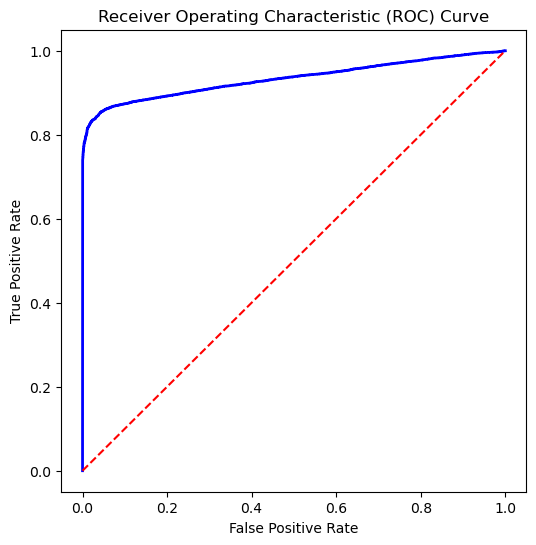

In [285]:
model1.Plot_roc_auc()

## Decision Tree

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42) fitted successfully

 Accuracy: 0.9202

Training Score: 0.9213125
Test Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8077     0]
 [ 1596 10327]]

Cross val score Matrix:
 0.9213125


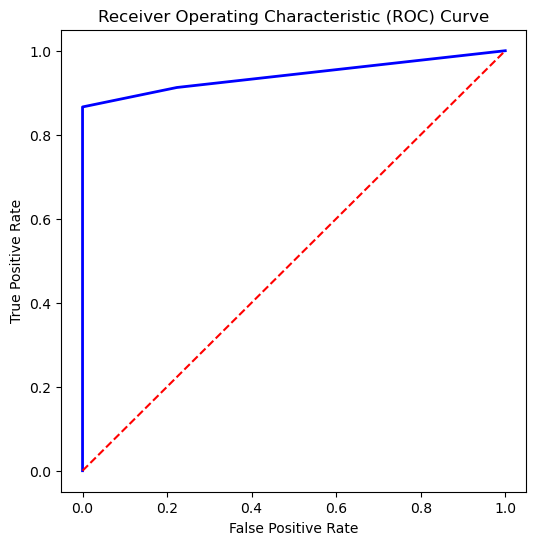

In [286]:
model2 = Diabities_Prediction_model(df3)
model2.train_test()
model2.column_tranformer(DecisionTreeClassifier(class_weight='balanced',max_depth=3,random_state=42,
                                                min_samples_split=2,
                                               min_samples_leaf=1))
model2.evalulate_model()
model2.Plot_roc_auc()



**Correctly identifies ~94% of diabetes cases (high sensitivity)
Keeps false alarms low
AUC ~0.94-0.95 = Very strong classifier***


***In Simple Terms:
Imagine screening 1000 people:***

***Your model: Catches 940 out of 1000 diabetes cases, with ~80 false alarms
Random model (red line): Catches 500, with 500 false alarms***



## Random Forest Classifier

In [287]:
model3 = Diabities_Prediction_model(df3)
model3.train_test()
model3.column_tranformer(RandomForestClassifier(  class_weight='balanced',
    n_estimators=100,        
    max_depth=6,            
    min_samples_split=20,    
    #min_samples_leaf=10,     
    random_state=42,
    n_jobs=-1))
model3.evalulate_model()

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=20, n_jobs=-1, random_state=42) fitted successfully

 Accuracy: 0.9202

Training Score: 0.9213125
Test Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8077     0]
 [ 1596 10327]]

Cross val score Matrix:
 0.9213125


## Baggaing Classifer

In [288]:
model4 = Diabities_Prediction_model(df3)
model4.train_test()
model4.column_tranformer(BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42,max_depth=5
                                                                            ,class_weight='balanced'),
                                           n_estimators=70,n_jobs=-1,max_samples=0.8,bootstrap=True))
model4.evalulate_model()

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   max_depth=5,
                                                   random_state=42),
                  max_samples=0.8, n_estimators=70, n_jobs=-1) fitted successfully

 Accuracy: 0.9202

Training Score: 0.9213125
Test Score: 0.9202

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8077
           1       1.00      0.87      0.93     11923

    accuracy                           0.92     20000
   macro avg       0.92      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000


Confusion Matrix:
 [[ 8077     0]
 [ 1596 10327]]

Cross val score Matrix:
 0.9213125


### We have taken Decision tree as our final MOdel , because baggaing also provide same results as decision tree so , we can use  decsion tree takes less computational time 


### Performing gridseach cv and finding the best parameters 

In [289]:
param_ = {
    "classifier__max_depth": [3, 5, 7, 10, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
}



Grid = GridSearchCV(estimator=model2.model,
                    cv=5,param_grid=param_,
                    n_jobs=-10,scoring='accuracy')

Grid.fit(model2.X_train,model2.y_train)

C:\Users\sam\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['hba1c',
                                                                          'glucose_postprandial',
                                                                          'glucose_fasting',
                                                                          'diabetes_risk_score',
                                                                          'physical_activity_minutes_per_week',
                                                                          'age',
                                                                          'triglycerides',
                                                                          'waist_to_hip_ratio',
                                                                          'ldl_hdl_ratio',
                                                                          'insulin_level'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               max_depth=3,
                                                               random_state=42))]),
             n_jobs=-10,
             param_grid={'classifier__max_depth': [3, 5, 7, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [91]:
Grid.score(model2.X_train,model2.y_train)

0.9214125

<Axes: xlabel='hba1c', ylabel='Density'>

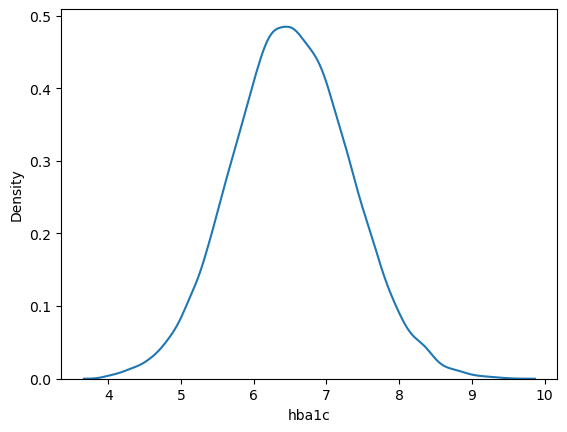

In [140]:
sns.kdeplot(model2.X_test['hba1c'])

## Saving the final Model : Decision tree using the Pickle file


### Final Model 

In [290]:
best_model = Grid.best_estimator_
best_model

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['hba1c',
                                                   'glucose_postprandial',
                                                   'glucose_fasting',
                                                   'diabetes_risk_score',
                                                   'physical_activity_minutes_per_week',
                                                   'age', 'triglycerides',
                                                   'waist_to_hip_ratio',
                                                   'ldl_hdl_ratio',
                                                   'insulin_level'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

In [291]:
import pickle


with open("Diabietes_best_final_model.pkl","wb") as f:
    pickle.dump(best_model,f)

In [292]:
##checking the file 
import os

In [293]:
os.path.abspath('Diabietes_best_final_model.pkl')

'C:\\Users\\sam\\Diabietes_best_final_model.pkl'

In [115]:
for i in dib_df[best_model.feature_names_in_.tolist()]:
    if dib_df[i].dtype == 'object':
        print(i,dib_df[i].unique())

smoking_status ['Never' 'Former' 'Current']
gender ['Male' 'Female' 'Other']


In [120]:
dib_df[best_model.feature_names_in_.tolist()]

,hba1c,glucose_postprandial,glucose_fasting,diabetes_risk_score,family_history_diabetes,bmi,age,heart_rate,diastolic_bp,smoking_status,gender,insulin_level
0,8.18,236,136,29.6,0,30.5,58,68,78,Never,Male,6.36
1,5.63,150,93,23.0,0,23.1,48,67,76,Former,Female,2.00
2,7.51,195,118,44.7,1,22.2,60,74,73,Never,Male,5.07
3,9.03,253,139,38.2,0,26.8,74,68,93,Never,Female,5.28
4,7.20,184,137,23.5,0,21.2,46,67,67,Never,Male,12.74
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5.55,109,113,26.0,0,29.8,46,63,74,Former,Male,14.58
99996,5.97,146,96,24.4,0,26.5,41,57,76,Never,Female,9.02
99997,5.21,132,93,27.6,0,25.6,57,69,87,Former,Female,2.57
99998,5.53,117,106,26.4,0,26.8,47,58,77,Never,Female,9.81


<Axes: xlabel='hba1c', ylabel='Density'>

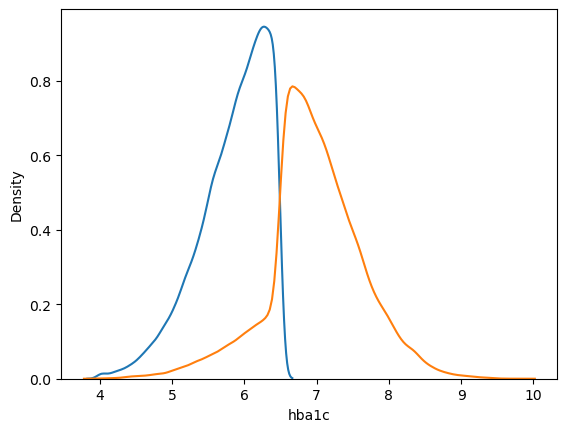

In [16]:
sns.kdeplot(dib_df[dib_df['diagnosed_diabetes']==0].hba1c)
sns.kdeplot(dib_df[dib_df['diagnosed_diabetes']==1].hba1c)

<Axes: xlabel='diabetes_risk_score', ylabel='Density'>

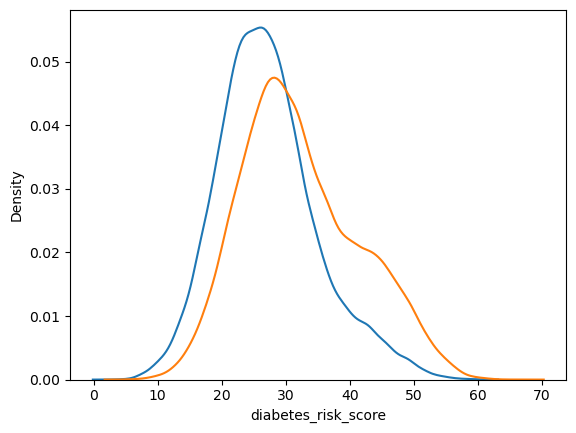

In [18]:
sns.kdeplot(dib_df[dib_df['diagnosed_diabetes']==0].diabetes_risk_score)
sns.kdeplot(dib_df[dib_df['diagnosed_diabetes']==1].diabetes_risk_score)

In [115]:
bm = best_model.feature_names_in_.dtype

In [116]:
model.feature_names_in_


dtype('O')

In [117]:
best_model.feature_names_in_.dtype

dtype('O')

## Exporting this final columnns to excel file 

dib_df2.to_csv("Dib_columns.csv",index=False)